In [1]:

import geopandas as gpd
import folium
import pandas as pd
from folium.plugins import FastMarkerCluster

#read in shapefile
sf = gpd.read_file("../raw_data/taxi_zones.shp")

#convert to longitude and latitudte
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
print(sf)

     OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           ge

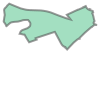

# Visualises busiest areas

In [2]:
#read in preprocessed data

df = pd.read_csv("../preprocessed data/busiest_locations.csv",index_col = 0)

df.columns


print(df)

     Pickup Location ID  Number of Pickups
0                   237            2210176
1                   161            2080688
2                   236            2021667
3                   162            1871456
4                   230            1820872
..                  ...                ...
256                  44                  7
257                   5                  7
258                 109                  6
259                 110                  2
260                 104                  1

[261 rows x 2 columns]


In [3]:

#Merging the preprocessed data with the shape file to create a geopandas dataframe
gdf = gpd.GeoDataFrame(pd.merge(df, sf, left_on='Pickup Location ID', right_on='LocationID')).drop('Pickup Location ID',axis=1)

gdf.sample(2)

,Number of Pickups,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
177,688,131,0.116547,0.000424,Jamaica Estates,131,Queens,"POLYGON ((-73.77733 40.72239, -73.77728 40.722..."
247,21,172,0.118476,0.000658,New Dorp/Midland Beach,172,Staten Island,"POLYGON ((-74.08655 40.56963, -74.08691 40.568..."


In [4]:
geoJSON = gdf[['LocationID','geometry']].drop_duplicates('LocationID').to_json()

In [ ]:


m_trip_distance = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

#plotting a geospacial cloropleth graph to visualise busy areas

choropleth = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=gdf, # data source
    columns=['LocationID','Number of Pickups'], # the columns required
    key_on='feature.properties.LocationID', # this is from the geoJSON's properties
    fill_color='YlGnBu', # color scheme
    fill_opacity=0.6,
    line_opacity=0,
    legend_name='Number of pickups' # legend title
).add_to(m_trip_distance)


#allowing us to check which locationID has the highest fare trips



m_trip_distance.save('../plots/foliumChoroplethMapPickUps.html')
m_trip_distance

# Looking at pick up zones in the manhattan area

In [56]:
# Looking at pick up zones in the manhattan area

gdfManhattan = gdf.loc[gdf["borough"]=="Manhattan"]
geoJSON = gdfManhattan[['LocationID','geometry']].drop_duplicates('LocationID').to_json()



m_manhattan_pickups = folium.Map(location=[40.80, -73.94], tiles="Stamen Terrain", zoom_start=11)

#plotting a geospacial cloropleth graph to visually indicate how busy zones are.


choropleth = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=gdfManhattan, # data source
    columns=['LocationID','Number of Pickups'], # the columns required
    key_on='feature.properties.LocationID', # this is from the geoJSON's properties
    fill_color='YlGnBu', # color scheme
    fill_opacity=0.6,
    line_opacity=0,
    legend_name='Fare' # legend title
).add_to(m_manhattan_pickups)




m_manhattan_pickups.save('../plots/ChoroplethManhattanPickups.html')
m_manhattan_pickups

,Number of Pickups,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2210176,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((-73.96613 40.76218, -73.96658 40.761..."
1,2080688,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((-73.97534 40.75530, -73.97581 40.754..."
2,2021667,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((-73.95779 40.77360, -73.95826 40.772..."
3,1871456,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((-73.97122 40.75519, -73.97168 40.754..."
4,1820872,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((-73.98362 40.75552, -73.98412 40.754..."
...,...,...,...,...,...,...,...,...
112,3102,194,0.081794,0.000273,Randalls Island,194,Manhattan,"POLYGON ((-73.91640 40.79768, -73.91545 40.797..."
122,2084,202,0.069922,0.000106,Roosevelt Island,202,Manhattan,"POLYGON ((-73.94180 40.76905, -73.94257 40.768..."
172,779,153,0.024737,0.000032,Marble Hill,153,Manhattan,"POLYGON ((-73.90667 40.87572, -73.90693 40.875..."
215,366,128,0.070209,0.000207,Inwood Hill Park,128,Manhattan,"MULTIPOLYGON (((-73.92360 40.87890, -73.92362 ..."


# Visualising the mean total_amount per area

In [2]:
#Visualising the mean fare for each zone


meandf = pd.read_csv("../preprocessed data/locationTotalamountMean.csv")


meangdf = gpd.GeoDataFrame(pd.merge(meandf, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)
meangdf.sample(2)


,Unnamed: 0,total_amount,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
147,149,13.991492,152,0.057909,0.000147,Manhattanville,152,Manhattan,"POLYGON ((-73.95357 40.82198, -73.95291 40.821..."
98,98,14.260477,100,0.024813,0.000037,Garment District,100,Manhattan,"POLYGON ((-73.98729 40.75045, -73.98777 40.749..."


In [3]:
geoJSON = meangdf[['LocationID','geometry']].drop_duplicates('LocationID').to_json()


In [5]:
#visualising the data for mean total amount per trip in each zone

m_mean_amount = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

#plotting a geospacial cloropleth graph to visually indicate mean total amount per trip in each zone

Meanchoropleth = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=meangdf, # data source
    columns=['LocationID','total_amount'], # the columns required
    key_on='feature.properties.LocationID', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='Mean total amount paid' # legend title
).add_to(m_mean_amount)


#allowing us to check which locationID has the highest fare trips
Meanchoropleth.geojson.add_child(folium.features.GeoJsonTooltip(['LocationID'],labels=True))




m_mean_amount.save('../plots/ChoroplethMeanTotalAmount.html')
m_mean_amount